### Bike Sharing System 

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system

<b>Problem Statement : </b>

The case study aims to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.


In [298]:
### Import the required python modules 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [299]:
## Read the data 
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [300]:
df.shape

(730, 16)

In [301]:
df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Data Dictionary 

=========================================
Dataset characteristics
=========================================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	
=========================================
License
=========================================
Use of this dataset in publications must be cited to the following publication:

[1] Fanaee-T, Hadi, and Gama, Joao, "Event labeling combining ensemble detectors and background knowledge", Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg, doi:10.1007/s13748-013-0040-3.

@article{
	year={2013},
	issn={2192-6352},
	journal={Progress in Artificial Intelligence},
	doi={10.1007/s13748-013-0040-3},
	title={Event labeling combining ensemble detectors and background knowledge},
	url={http://dx.doi.org/10.1007/s13748-013-0040-3},
	publisher={Springer Berlin Heidelberg},
	keywords={Event labeling; Event detection; Ensemble learning; Background knowledge},
	author={Fanaee-T, Hadi and Gama, Joao},
	pages={1-15}
}

=========================================
Contact
=========================================
	
For further information about this dataset please contact Hadi Fanaee-T (hadi.fanaee@fe.up.pt)


### Data understanding, preparation and EDA

Data quality checks, if any, are performed, and all data quality issues are addressed in the right way. Explanations for data quality issues are clearly mentioned in comments.

Categorical variables are handled appropriately.

Dummy variables are created properly wherever applicable.
 

New metrics are derived if applicable and are used for analysis and modelling.
 

The data is converted to a clean format suitable for analysis.

In [302]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [303]:
## Dropping the columns with less significance to predict our target variable "cnt".
##  instant - is only a serial number and does not carry any significance 
##  casual , registered - variables are already represented through the cnt variable
## dteday - since we have yr,month,weekday alredy representing these details 

df.drop(columns=['instant','casual','registered',"dteday"],inplace=True)

In [304]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [305]:
df.weekday.value_counts()

0    105
1    105
6    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

In [306]:
### Handling the Nominal categorical variables with respective values as per Data dictionary
df.season.replace({ 1:"spring", 2:"summer", 3:"fall",4:"winter"},inplace=True)
df.mnth.replace({1:"Jan",2:"Feb",3:"March",4:"April",5:"May",6:"June",7:"July",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"},inplace=True)
df.weekday.replace({0:"Sun",1:"Mon",2:"Tue",3:"Wed",4:"Thur",5:"Fri",6:"Sat"},inplace=True)
df.weathersit.replace({1:"Clear",2:"Misty",3:"LightRain",4:"HeavyRains"},inplace=True)

In [307]:
### Check for null values handling in the remaining columns.

for i in df.columns:
    print(df[i].isnull().sum())

0
0
0
0
0
0
0
0
0
0
0
0


In [308]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


<Figure size 432x288 with 0 Axes>

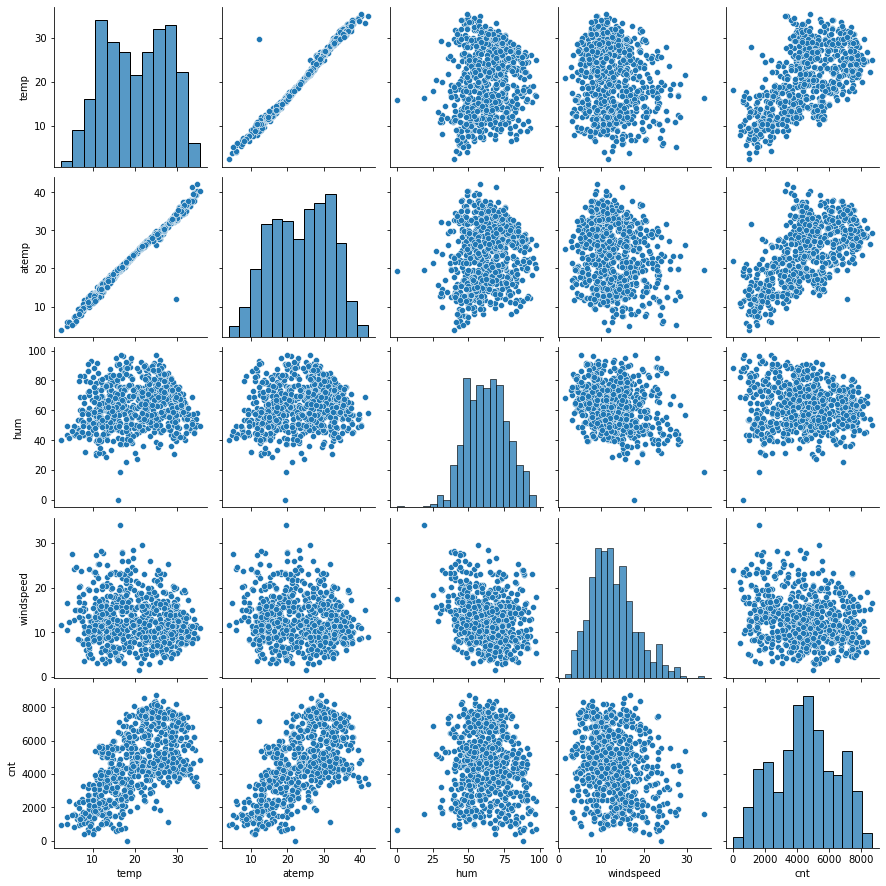

In [309]:
### Understand the correlation of the numeric variables 
num_vars=["temp","atemp","hum","windspeed","cnt"]
plt.figure()
sns.pairplot(df,vars=num_vars)
plt.show()

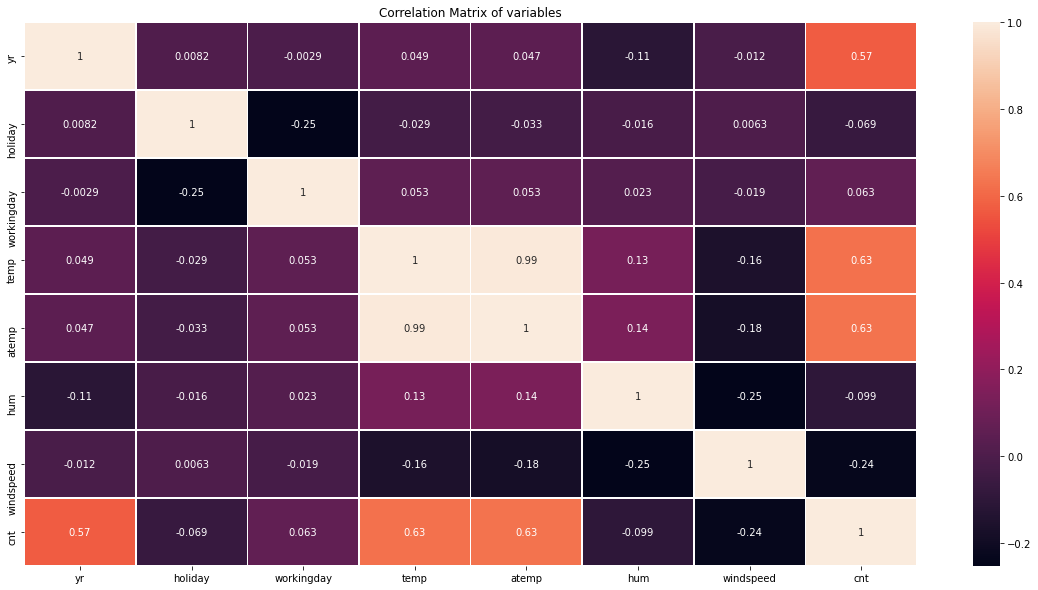

In [312]:
corr = df.corr()
plt.figure(figsize=(20,10))
plt.title("Correlation Matrix of variables")
sns.heatmap(corr, linewidths=.5,annot=True)
plt.show()

##### Based on the correlation matrix the target variable  "cnt"  is highly correlated with  "temp" , "atemp", followed by "yr" and "season" variables. 

## Create Dummy variables for categorical variables



In [314]:
## In the remaining columns the variables "season,mnth,weekday,workingday,weathersit" are categorical variables 
## with more than two levels and needs to be transformed to dummy variables 

cat_var = ["season","mnth","weekday","weathersit"]

df_new = pd.get_dummies(df,columns=cat_var,drop_first=True)

print(df_new.shape)
print(df_new)

(730, 30)
     yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0     0        0           0  14.110847  18.18125  80.5833  10.749882   985   
1     0        0           0  14.902598  17.68695  69.6087  16.652113   801   
2     0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3     0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4     0        0           1   9.305237  11.46350  43.6957  12.522300  1600   
..   ..      ...         ...        ...       ...      ...        ...   ...   
725   1        0           1  10.420847  11.33210  65.2917  23.458911  2114   
726   1        0           1  10.386653  12.75230  59.0000  10.416557  3095   
727   1        0           0  10.386653  12.12000  75.2917   8.333661  1341   
728   1        0           0  10.489153  11.58500  48.3333  23.500518  1796   
729   1        0           1   8.849153  11.17435  57.7500  10.374682  2729   

     season_spring  season_summer  ...  m

## Model building and evaluation 

Model parameters are tuned using correct principles and the approach is explained clearly. Both the technical and business aspects are considered while building the model. 

Correct variable selection techniques are used. A reasonable number of different models are attempted and the best one is chosen based on key performance metrics.


Residual analysis is performed after model building and the assumptions are validated.
 

Model evaluation is done using the correct principles and appropriate evaluation metrics are chosen.


The results are on par with the best possible model on the dataset.


The model is interpreted and explained correctly. The commented code includes a brief explanation of the important variables and the model in simple terms.

## Splitting the dataset 

In [315]:
bike_train, bike_test = train_test_split(df_new, train_size = 0.70, test_size = 0.30, random_state = 120)
print(bike_train.shape)
print(bike_test.shape)

(510, 30)
(219, 30)


In [316]:
bike_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_June',
       'mnth_March', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thur',
       'weekday_Tue', 'weekday_Wed', 'weathersit_LightRain',
       'weathersit_Misty'],
      dtype='object')

In [317]:
## Taking backup
bkp = bike_train 


## Rescaling the Dataset 

In [318]:
### Here we only need to rescale the numerical variables and need to exlcude the categorical variables 

from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler()
num_vars = ["temp","atemp","hum","windspeed"]
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [319]:
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_LightRain,weathersit_Misty
557,1,0,1,0.818284,0.770256,0.550216,0.296736,7446,0,0,...,0,0,0,0,0,1,0,0,0,0
629,1,0,0,0.736253,0.711117,0.671862,0.623114,8395,0,0,...,0,1,0,1,0,0,0,0,0,0
503,1,0,0,0.673950,0.652800,0.474026,0.146917,8294,0,1,...,0,0,0,1,0,0,0,0,0,0
81,0,0,1,0.358646,0.346406,0.872275,0.505448,2121,0,1,...,0,0,0,0,0,0,0,1,0,1
709,1,0,1,0.366591,0.346973,0.619914,0.652825,5501,0,0,...,0,0,0,0,0,0,1,0,0,1


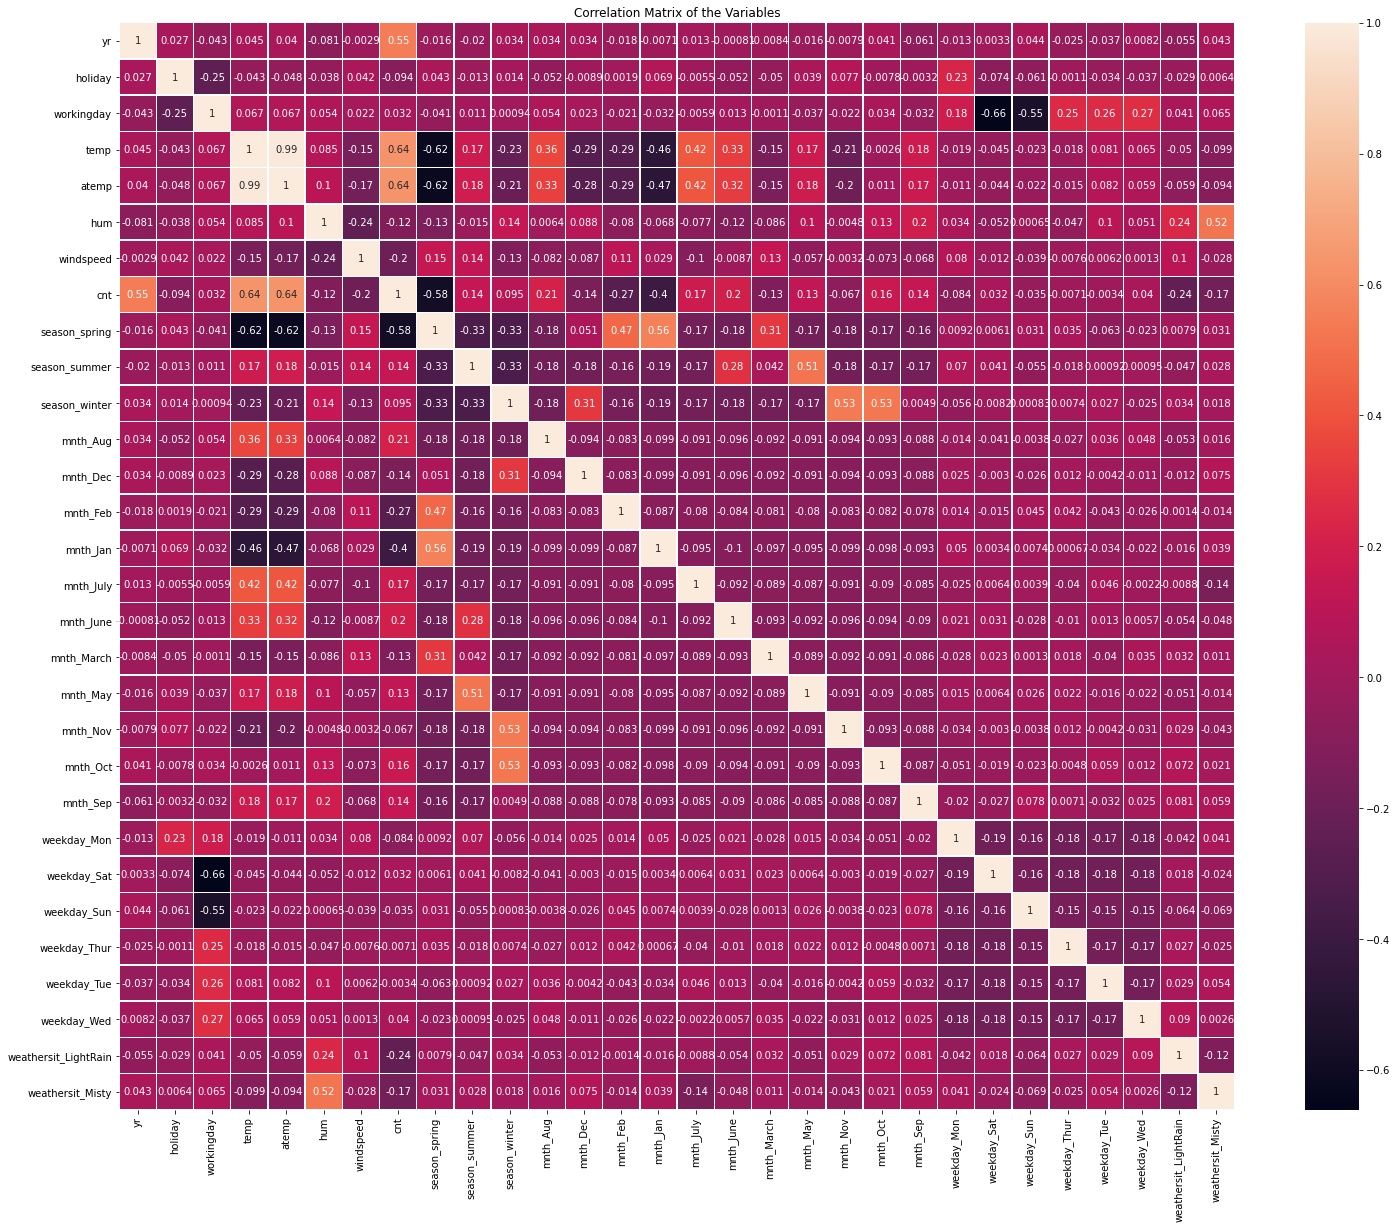

In [320]:
plt.figure(figsize=(25,20))
plt.title("Correlation Matrix of the Variables")
sns.heatmap(bike_train.corr(),annot=True,linewidths=0.5)
plt.show()

## Inferences 

- From the above correlation matrix looks like target variable "cnt" has higher correlation with "temp","yr","mnth_aug","mnth_June","mnth_July","season_summer".

### Model Building 

In [321]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score


In [322]:
Y_train = bike_train.pop("cnt")
X_train = bike_train 

In [323]:
print(Y_train.shape)
print(X_train.shape)

(510,)
(510, 29)


#### Feature Selection

In [324]:
## Since we have lot of columns it is difficult to perform manual selection 
## so we first filter out the top 5 features using RFE (Recursive Feature Elimination) technique

lm=LinearRegression()
lm.fit(X_train,Y_train)

selector = RFE(lm, 15)      
selector = selector.fit(X_train, Y_train)

X_train.columns[selector.support_]

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_Dec', 'mnth_July', 'mnth_Nov', 'mnth_Sep',
       'weekday_Sat', 'weathersit_LightRain', 'weathersit_Misty'],
      dtype='object')

In [325]:
## Dropped column information to be used during testing.
X_train.columns[~selector.support_]

Index(['workingday', 'season_summer', 'mnth_Aug', 'mnth_Feb', 'mnth_Jan',
       'mnth_June', 'mnth_March', 'mnth_May', 'mnth_Oct', 'weekday_Mon',
       'weekday_Sun', 'weekday_Thur', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

In [326]:
## List of selcted columns and their rankings
a = list(zip(X_train.columns[selector.support_],selector.ranking_))

df_sub = pd.DataFrame(a,columns=["Features","Ranks"])  
df_sub.sort_values(by="Ranks")

,Features,Ranks
0,yr,1
1,holiday,1
3,atemp,1
4,hum,1
5,windspeed,1
6,season_spring,1
7,season_winter,1
9,mnth_July,1
11,mnth_Sep,1
14,weathersit_Misty,1


In [327]:
### Apply statsmodel api on this filtered columns 

X_train_new = X_train[X_train.columns[selector.support_]]


## Build models using the statsmodel api 

In [328]:
### Import statsmodel api 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_sm = X_train_new

### Model 1 using all variables from RFE

In [331]:
# Add constant intercept 
X_train_sm = sm.add_constant(X_train_sm)

# Creating the first model
lr1 = sm.OLS(Y_train, X_train_sm).fit()


In [332]:
print(lr1.params)
lr1.summary()

const                   3003.967937
yr                      1981.411909
holiday                 -870.764177
temp                    3010.764778
atemp                    921.061835
hum                    -1337.150090
windspeed               -870.610619
season_spring          -1074.821024
season_winter            810.685448
mnth_Dec                -467.034051
mnth_July               -587.171640
mnth_Nov                -757.000653
mnth_Sep                 459.571953
weekday_Sat              232.092661
weathersit_LightRain   -2019.081865
weathersit_Misty        -513.313269
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     174.0
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          4.75e-186
Time:                        23:26:08   Log-Likelihood:                -4114.7
No. Observations:                 510   AIC:                             8261.
Df Residuals:                     494   BIC:                             8329.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 3003.9679    289.850     10.364      0.000    2434.476    3573.460
yr                    1981.4119     70.819     27.979      0.000    1842.268    2120.556
holiday               -870.7642    214.756     -4.055      0.000   -1292.713    -448.816
temp                  3010.7648   1109.004      2.715      0.007     831.819    5189.711
atemp                  921.0618   1144.336      0.805      0.421   -1327.305    3169.429
hum                  -1337.1501    331.174     -4.038      0.000   -1987.834    -686.466
windspeed             -870.6106    205.745     -4.231      0.000   -1274.854    -466.367
season_spring        -1074.8210    133.320     -8.062      0.000   -1336.766    -812.876
season_winter          810.6854    122.410      6.623      0.000     570.178    1051.193
mnth_Dec              -467.0341    145.681     -3.206      0.001    -753.264    -180.804
mnth_July             -587.1716    145.836     -4.026      0.000    -873.706    -300.637
mnth_Nov              -757.0007    161.420     -4.690      0.000   -1074.155    -439.846
mnth_Sep               459.5720    138.714      3.313      0.001     187.030     732.114
weekday_Sat            232.0927     94.867      2.447      0.015      45.700     418.485
weathersit_LightRain -2019.0819    231.509     -8.721      0.000   -2473.945   -1564.219
weathersit_Misty      -513.3133     94.795     -5.415      0.000    -699.565    -327.062
==============================================================================
Omnibus:                       96.465   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              281.978
Skew:                          -0.899   Prob(JB):                     5.88e-62
Kurtosis:                       6.168   Cond. No.                         75.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [228]:
## Calculate VIF values of these variables 

vif_df = pd.DataFrame()
vif_df['Features'] = X_train_sm.columns
vif_df['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif_df['VIF'] = round(vif_df['VIF'],2)
print(vif_df.sort_values(by='VIF',ascending=False))

                Features    VIF
0                  const  69.62
3                   temp  53.99
4                  atemp  52.50
7          season_spring   2.74
8          season_winter   2.32
5                    hum   1.98
11              mnth_Nov   1.70
15      weathersit_Misty   1.67
9               mnth_Dec   1.39
10             mnth_July   1.30
14  weathersit_LightRain   1.27
6              windspeed   1.20
12              mnth_Sep   1.13
1                     yr   1.04
2                holiday   1.02
13           weekday_Sat   1.02


### Build Model 2 

In [333]:
### Dropping the "atemp" variable as it has higher p-value and a higher VIF compared to other variables

X_train_sm = X_train_new.drop("atemp",axis=1)


In [334]:

# Add constant intercept to X_train_sm

X_train_sm = sm.add_constant(X_train_sm)

# Create the model with new variables 
lr2 = sm.OLS(Y_train, X_train_sm).fit()

print(lr2.params)
lr2.summary()

const                   3014.656044
yr                      1979.958505
holiday                 -875.640562
temp                    3875.836237
hum                    -1312.176382
windspeed               -892.455771
season_spring          -1077.301475
season_winter            817.283829
mnth_Dec                -468.511206
mnth_July               -584.753754
mnth_Nov                -759.016138
mnth_Sep                 453.368938
weekday_Sat              232.308016
weathersit_LightRain   -2034.349884
weathersit_Misty        -516.706608
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     186.5
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          4.71e-187
Time:                        23:26:26   Log-Likelihood:                -4115.1
No. Observations:                 510   AIC:                             8260.
Df Residuals:                     495   BIC:                             8324.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 3014.6560    289.443     10.415      0.000    2445.968    3583.344
yr                    1979.9585     70.771     27.977      0.000    1840.910    2119.007
holiday               -875.6406    214.594     -4.080      0.000   -1297.269    -454.012
temp                  3875.8362    273.310     14.181      0.000    3338.845    4412.827
hum                  -1312.1764    329.600     -3.981      0.000   -1959.764    -664.588
windspeed             -892.4558    203.875     -4.377      0.000   -1293.022    -491.889
season_spring        -1077.3015    133.237     -8.086      0.000   -1339.082    -815.521
season_winter          817.2838    122.091      6.694      0.000     577.403    1057.165
mnth_Dec              -468.5112    145.617     -3.217      0.001    -754.615    -182.407
mnth_July             -584.7538    145.753     -4.012      0.000    -871.124    -298.383
mnth_Nov              -759.0161    161.343     -4.704      0.000   -1076.018    -442.014
mnth_Sep               453.3689    138.450      3.275      0.001     181.346     725.391
weekday_Sat            232.3080     94.833      2.450      0.015      45.984     418.632
weathersit_LightRain -2034.3499    230.648     -8.820      0.000   -2487.520   -1581.180
weathersit_Misty      -516.7066     94.668     -5.458      0.000    -702.707    -330.707
==============================================================================
Omnibus:                       95.110   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              277.676
Skew:                          -0.887   Prob(JB):                     5.05e-61
Kurtosis:                       6.150   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [335]:
## Check the VIF values of new model 
vif_df = pd.DataFrame()
vif_df['Features'] = X_train_sm.columns
vif_df['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif_df['VIF'] = round(vif_df['VIF'],2)
print(vif_df.sort_values(by='VIF',ascending=False))

                Features    VIF
0                  const  69.47
3                   temp   3.28
6          season_spring   2.74
7          season_winter   2.31
4                    hum   1.96
10              mnth_Nov   1.70
14      weathersit_Misty   1.67
8               mnth_Dec   1.39
9              mnth_July   1.30
13  weathersit_LightRain   1.26
5              windspeed   1.18
11              mnth_Sep   1.12
1                     yr   1.04
2                holiday   1.02
12           weekday_Sat   1.02


## Build Model 3 


In [336]:
### Now that p-value of all variables is mostly equal to 0 , 
### Dropping "temp" which has the next highest VIF value 

X_train_sm = X_train_new.drop(columns=["atemp","temp"],axis=1)


In [337]:
# Add constant intercept to X_train_sm
X_train_sm = sm.add_constant(X_train_sm)

# Create the model with new variables 
lr3 = sm.OLS(Y_train, X_train_sm).fit()

print(lr3.params)
lr3.summary()

const                   5224.822487
yr                      2087.967825
holiday                 -861.365289
hum                     -501.609158
windspeed              -1097.869608
season_spring          -2446.746907
season_winter            205.534123
mnth_Dec                -994.166149
mnth_July                127.588619
mnth_Nov               -1271.672069
mnth_Sep                 602.246466
weekday_Sat              136.856089
weathersit_LightRain   -2420.918189
weathersit_Misty        -749.727259
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     132.1
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          1.10e-151
Time:                        23:26:31   Log-Likelihood:                -4202.0
No. Observations:                 510   AIC:                             8432.
Df Residuals:                     496   BIC:                             8491.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 5224.8225    288.940     18.083      0.000    4657.126    5792.519
yr                    2087.9678     83.353     25.050      0.000    1924.200    2251.736
holiday               -861.3653    254.220     -3.388      0.001   -1360.846    -361.884
hum                   -501.6092    384.550     -1.304      0.193   -1257.157     253.939
windspeed            -1097.8696    240.913     -4.557      0.000   -1571.206    -624.534
season_spring        -2446.7469    108.749    -22.499      0.000   -2660.412   -2233.082
season_winter          205.5341    135.308      1.519      0.129     -60.314     471.382
mnth_Dec              -994.1661    166.825     -5.959      0.000   -1321.937    -666.395
mnth_July              127.5886    162.090      0.787      0.432    -190.879     446.057
mnth_Nov             -1271.6721    186.278     -6.827      0.000   -1637.664    -905.680
mnth_Sep               602.2465    163.545      3.682      0.000     280.920     923.573
weekday_Sat            136.8561    112.062      1.221      0.223     -83.318     357.030
weathersit_LightRain -2420.9182    271.326     -8.923      0.000   -2954.009   -1887.828
weathersit_Misty      -749.7273    110.447     -6.788      0.000    -966.729    -532.725
==============================================================================
Omnibus:                       64.762   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.542
Skew:                          -0.618   Prob(JB):                     1.03e-39
Kurtosis:                       5.631   Cond. No.                         18.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [338]:
## Check the VIF values of new model 
vif_df = pd.DataFrame()
vif_df['Features'] = X_train_sm.columns
vif_df['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif_df['VIF'] = round(vif_df['VIF'],2)
print(vif_df.sort_values(by='VIF',ascending=False))

                Features    VIF
0                  const  49.33
6          season_winter   2.02
3                    hum   1.90
9               mnth_Nov   1.62
13      weathersit_Misty   1.62
5          season_spring   1.30
7               mnth_Dec   1.30
12  weathersit_LightRain   1.24
4              windspeed   1.17
8              mnth_July   1.15
10              mnth_Sep   1.12
1                     yr   1.03
2                holiday   1.02
11           weekday_Sat   1.01


#### After dropping the variable temp , we are seeing the Adj.R2 has dropped significantly from 0.836 to 0.7.  So we can stop dropping the variables further and conclude Model 2 as best fit.

### Build Model 4 
#### Fitting the model by taking the top ranked variables from RFE feature selection

1 	yr 	1

2 	holiday 	1

3 	atemp 	1

4 	hum 	1

5 	windspeed 	1

6 	season_spring 	1

7 	season_winter 	1

8 	mnth_July 	1

9 	mnth_Sep 	1

10 	weathersit_Misty 	1 

In [339]:
### Filter the above columns 

X_train_sm = bike_train[["yr","holiday","atemp","hum","windspeed","season_spring","season_winter","mnth_July","mnth_Sep","weathersit_Misty"]]


In [340]:
# Add constant intercept to X_train_sm
X_train_sm = sm.add_constant(X_train_sm)

# Create the model with new variables 
lr4 = sm.OLS(Y_train, X_train_sm).fit()
print(lr4.params)
lr4.summary()

const               3487.636600
yr                  1981.277693
holiday             -921.394556
atemp               4577.523793
hum                -2608.085083
windspeed          -1156.453955
season_spring       -999.437497
season_winter        500.054901
mnth_July           -685.100742
mnth_Sep             514.436184
weathersit_Misty    -217.036103
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     206.3
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          3.69e-170
Time:                        23:26:40   Log-Likelihood:                -4166.2
No. Observations:                 510   AIC:                             8354.
Df Residuals:                     499   BIC:                             8401.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3487.6366    301.001     11.587      0.000    2896.251    4079.022
yr                1981.2777     77.752     25.482      0.000    1828.516    2134.040
holiday           -921.3946    234.785     -3.924      0.000   -1382.683    -460.106
atemp             4577.5238    294.241     15.557      0.000    3999.420    5155.628
hum              -2608.0851    330.539     -7.890      0.000   -3257.504   -1958.666
windspeed        -1156.4540    219.617     -5.266      0.000   -1587.941    -724.967
season_spring     -999.4375    143.002     -6.989      0.000   -1280.398    -718.476
season_winter      500.0549    116.702      4.285      0.000     270.766     729.344
mnth_July         -685.1007    159.318     -4.300      0.000    -998.118    -372.083
mnth_Sep           514.4362    150.787      3.412      0.001     218.180     810.693
weathersit_Misty  -217.0361     97.848     -2.218      0.027    -409.282     -24.790
==============================================================================
Omnibus:                      107.108   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              338.927
Skew:                          -0.969   Prob(JB):                     2.53e-74
Kurtosis:                       6.491   Cond. No.                         17.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [341]:
## Check the VIF values of new model 
vif_df = pd.DataFrame()
vif_df['Features'] = X_train_sm.columns
vif_df['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif_df['VIF'] = round(vif_df['VIF'],2)
print(vif_df.sort_values(by='VIF',ascending=False))

            Features    VIF
0              const  61.97
3              atemp   2.87
6      season_spring   2.60
7      season_winter   1.74
4                hum   1.63
10  weathersit_Misty   1.47
8          mnth_July   1.28
5          windspeed   1.13
9           mnth_Sep   1.10
1                 yr   1.03
2            holiday   1.01


### Inference

From all the above <b> Model 2 </b> has the highest Adj.R2 of 0.836 and lowest AIC value , so we will go with Model 2 as the best fit for this regression analysis.

## Residual Analyis 

In [342]:
### Check if the error terms are notmally distributed for the Model 2 that we considered best fit. 

## Construct the X_train similar to model2 
X_train_lm2 = X_train_new.drop("atemp",axis=1)
X_train_lm2 = sm.add_constant(X_train_lm2)


In [343]:
## Predict Y values
Y_pred = lr2.predict(X_train_lm2)

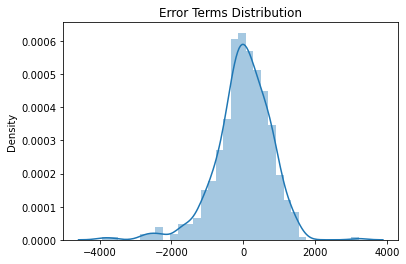

In [344]:
## Check the Distplot of the error term
res = Y_train - Y_pred
plt.figure()
plt.title("Error Terms Distribution")
sns.distplot(res)
plt.show()

### Inference 
From the above dist plot we can conclued the error terms are normally distributed.

##  Making Prediction of Y values for the test dataset using the final model 

In [345]:
### Before we apply predict function on the test dataset we need to apply all transformations we did before 
### with training dataset 
### 1) Apply MinMaxScaler for the numberic variables 
### 2) Drop all variable not part of RFE 

bike_test.shape

(219, 30)

In [346]:
## Apply scaling 


scaler = MinMaxScaler()

num_vars = ["temp","atemp","hum","windspeed"]

bike_test[num_vars] = scaler.fit_transform(bike_test[num_vars])

In [347]:
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_LightRain,weathersit_Misty
49,0,0,0,0.402555,0.394262,0.000000,1.000000,1635,1,0,...,0,0,0,1,0,0,0,0,0,0
611,1,0,1,0.837060,0.792458,0.722783,0.417098,6864,0,0,...,0,1,0,0,0,0,1,0,0,0
547,1,0,1,0.911326,0.812874,0.330323,0.328840,6227,0,0,...,0,0,1,0,0,0,0,0,0,0
432,1,0,1,0.418072,0.401915,0.279341,0.800793,4569,1,0,...,0,0,0,0,0,0,0,0,0,1
489,1,0,0,0.698507,0.654625,0.724907,0.237957,6883,0,1,...,0,0,0,1,0,0,0,0,0,1


In [348]:
Y_test = bike_test.pop('cnt')
X_test = bike_test

In [349]:
X_test = X_test[ X_test.columns[selector.support_] ] 

In [350]:
#### Drop the "atemp" variable and add the constant
X_test = X_test.drop("atemp",axis=1)
X_test = sm.add_constant(X_test)

In [351]:
X_test.shape

(219, 15)

In [352]:
### Predict the Y_test_pred using Model2

Y_test_pred = lr2.predict(X_test)

## Model Evaluation

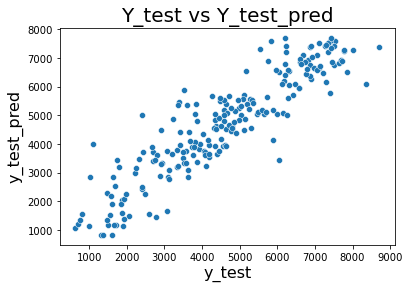

In [353]:
## Scatter plot of the Y_test vs Y_pred should not indicate any particular pattern

plt.figure()
sns.scatterplot(Y_test,Y_test_pred)
plt.title("Y_test vs Y_test_pred",fontsize=20)
plt.xlabel('y_test', fontsize = 16)                          
plt.ylabel('y_test_pred', fontsize = 16)    
plt.show()


#### We can see that the equation of our best fitted line is:

<i> 
cnt = 1979.95 x yr - 875.64 x holiday + 3875.83 x temp - 1312.17 x hum - 892.45 x windspeed - 1077.30 x season_spring + 817.28 x season_winter - 468.51 x mnth_Dec - 584.75 x mnth_July -759 x mnth_Nov + 453.36 x mnth_Sep + 232.30 x weekday_Sat  - 2034.34 x weathersit_LightRain - 516.70 x weathersit_Misty 
</i>


## Final Report in Business terms

The top 5 factors that influence the Shared bikes demand are 

<b>temp - Every unit increase in temperature will increase the demand by 3875 times

year  - Every year the demand for shared bikes is growing by 1979 times 

Weathersit_LightRain - The demand for shared bikes decreases by 2034 times in case of a light rainfall

Humidity  -   An increase of one unit in the humidity will decrease the demand for shared bikes by 1312 times.

season_spring - The demand for shared bikes decreases by 1077 times during the Spring season  </b>

In [292]:
### Final r2_score of the model based on predicted values
from sklearn.metrics import r2_score
r2_score(Y_test, Y_test_pred)

0.820972595499392

#### Inference 

R2 score of the testing dataset 0.820 is almost same as we got final model with training dataset 0.841